### Encoding Algorithms

##### Import the required libraries

In [2]:
from os import listdir
import matplotlib.pyplot as plt

import Arithematic_Encoding as AE
import LZW_Encoding as LZW
import Huffman_Encoding as Huff

##### Execute Huffman, Arithmetic and LZW coding on all files in the Input_Files directory

In [3]:
filepath = "./Input_Files/"

files = listdir(filepath)

res_ae = []
res_lzw = []
res_huffman = []
for file in files:
    filename = filepath+file
    print()
    print(filename)
    res_huffman.append(Huff.doHuffman(filename))
    res_lzw.append(LZW.do_Lempel_Ziv_Welch(filename))
    res_ae.append(AE.do_Arithmetic_Encoding(filename))


./Input_Files/alice.txt
symbols:  dict_keys(['A', 'B', 'C', 'D', 'E'])
probabilities:  dict_values([7, 1, 6, 2, 5])
symbols with codes {'A': '00', 'C': '01', 'E': '10', 'D': '110', 'B': '111'}
Space usage before compression (in bits): 168
Space usage after compression (in bits): 45
Compression ratio  =  3.7333333333333334
Original and Decoded file MATCH
data size =  21
Encoding Time =  0.00025350000214530155
Deconding Time =  8.410000009462237e-05

LZW: Symbol Table
{'\x00': 0, '\x01': 1, '\x02': 2, '\x03': 3, '\x04': 4, '\x05': 5, '\x06': 6, '\x07': 7, '\x08': 8, '\t': 9, '\n': 10, '\x0b': 11, '\x0c': 12, '\r': 13, '\x0e': 14, '\x0f': 15, '\x10': 16, '\x11': 17, '\x12': 18, '\x13': 19, '\x14': 20, '\x15': 21, '\x16': 22, '\x17': 23, '\x18': 24, '\x19': 25, '\x1a': 26, '\x1b': 27, '\x1c': 28, '\x1d': 29, '\x1e': 30, '\x1f': 31, ' ': 32, '!': 33, '"': 34, '#': 35, '$': 36, '%': 37, '&': 38, "'": 39, '(': 40, ')': 41, '*': 42, '+': 43, ',': 44, '-': 45, '.': 46, '/': 47, '0': 48, '1': 49

##### Sort the algorithms based on file size before visualizing the result

In [4]:

res_ae = sorted(res_ae, key = lambda x: x [0])
res_huffman = sorted(res_huffman, key = lambda x: x [0])
res_lzw = sorted(res_lzw, key = lambda x: x [0])

##### Helper functions to plot graphs

In [5]:

def mb(size):
  return size / 1024*1024

def plot_file_size_vs_algo_stat(file_sizes, stat, algo_title, xlabel, ylabel, color):
  # plotting the points 
  plt.plot(file_sizes, stat, color=color, linewidth = 3, marker='o', markersize=12, label = algo_title)

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(xlabel + " vs " + ylabel)
  plt.legend(loc="best")

  plt.show()


def plot_stat_compare(file_sizes, stat_huffman, stat_ae, stat_lzw, xlabel, ylabel):

  # plotting the points 
  plt.plot(file_sizes, stat_huffman, color='red', linewidth = 3, marker=6, markersize=12, label = 'Huffman')
  plt.plot(file_sizes, stat_ae, color='green', linewidth = 3, marker='*', markersize=12, label = 'Arithematic')
  plt.plot(file_sizes, stat_lzw, color='blue', linewidth = 3, marker=7, markersize=12, label = 'LZW')

  # plt.ylim(0, 60000)

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(xlabel + " vs " + ylabel)
  plt.legend(loc="best")

  plt.show()



orig_huffman_size = list(list(zip(*res_huffman))[0])
compressed_huffman_size = list(list(zip(*res_huffman))[1])
encoding_time_huffman = list(list(zip(*res_huffman))[2])
decoding_time_huffman = list(list(zip(*res_huffman))[3])
cr_huffman = [x / y for x, y in zip(orig_huffman_size, compressed_huffman_size)]
# cr_huffman = [3.7333333333333334, 1.651307284383822, 1.7700671295372312]

orig_ae_size = list(list(zip(*res_ae))[0])
compressed_ae_size = list(list(zip(*res_ae))[1])
encoding_time_ae = list(list(zip(*res_ae))[2])
decoding_time_ae = list(list(zip(*res_ae))[3])
cr_ae = [x / y for x, y in zip(orig_ae_size, compressed_ae_size)]

orig_lzw_size = list(list(zip(*res_lzw))[0])
compressed_lzw_size = list(list(zip(*res_lzw))[1])
encoding_time_lzw = list(list(zip(*res_lzw))[2])
decoding_time_lzw = list(list(zip(*res_lzw))[3])
cr_lzw = [x / y for x, y in zip(orig_lzw_size, compressed_lzw_size)]


file_sizes = orig_ae_size[:]

def plot_stats(cr, encoding_time, decoding_time, file_sizes, algo_title, color):
  plot_file_size_vs_algo_stat(file_sizes, cr, algo_title, 
                              'File Size (KB)','Compression Ratio', color)
  plot_file_size_vs_algo_stat(file_sizes, encoding_time, algo_title, 
                              'File Size (KB)','Encoding Time', color)
  plot_file_size_vs_algo_stat(file_sizes, decoding_time, algo_title, 
                              'File Size (KB)','Decoding Time', color)

##### Huffman Coding Results

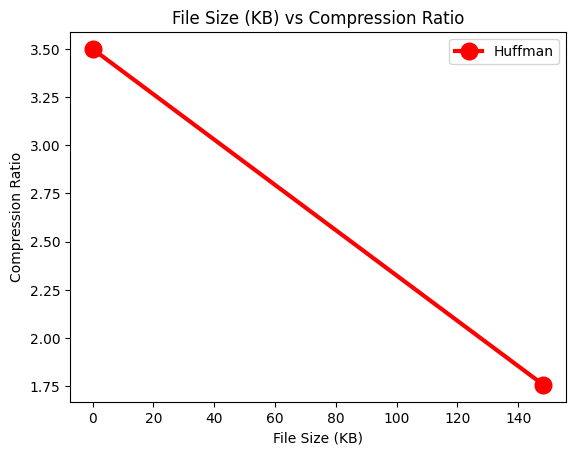

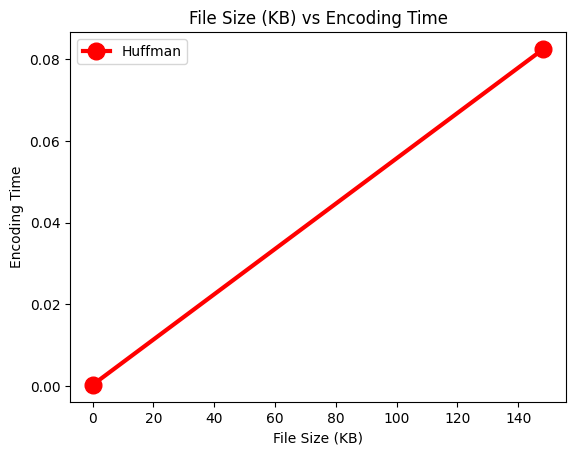

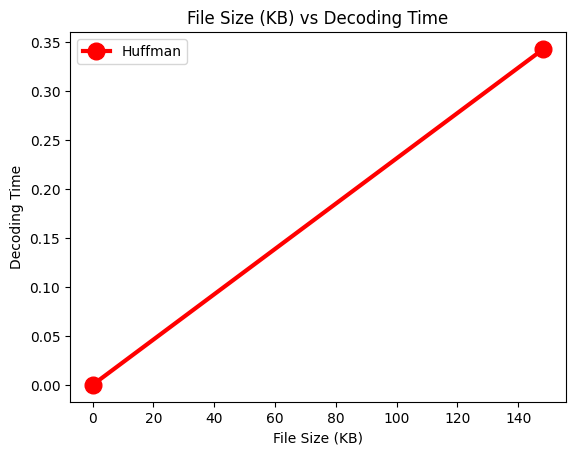

In [6]:
plot_stats(cr_huffman, encoding_time_huffman, decoding_time_huffman, file_sizes, 'Huffman', "red")

##### Arithmetic Coding Results

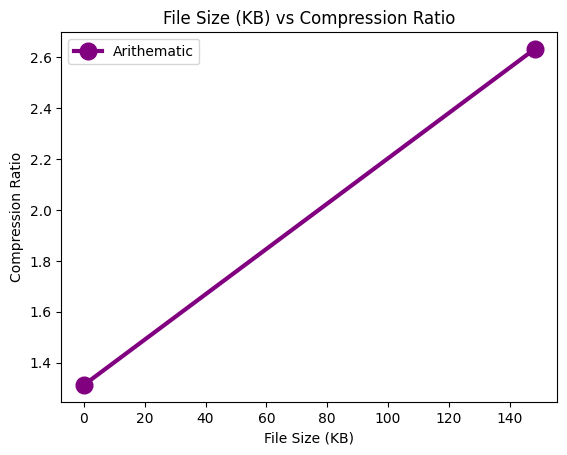

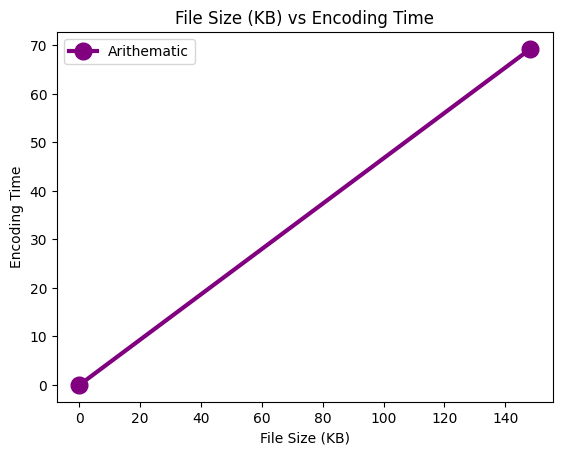

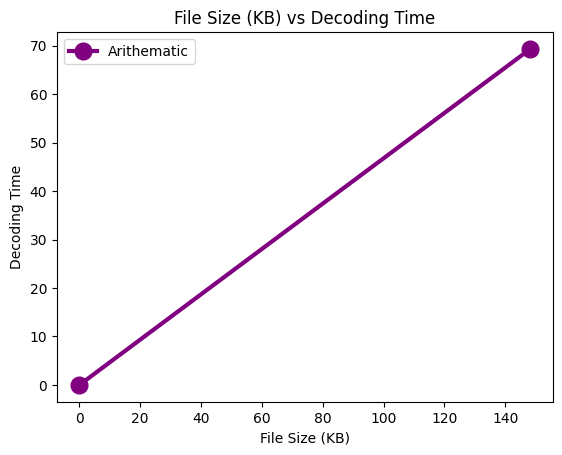

In [7]:
plot_stats(cr_ae, encoding_time_ae, decoding_time_ae, file_sizes, 'Arithematic', "purple")

##### LZW Coding Results

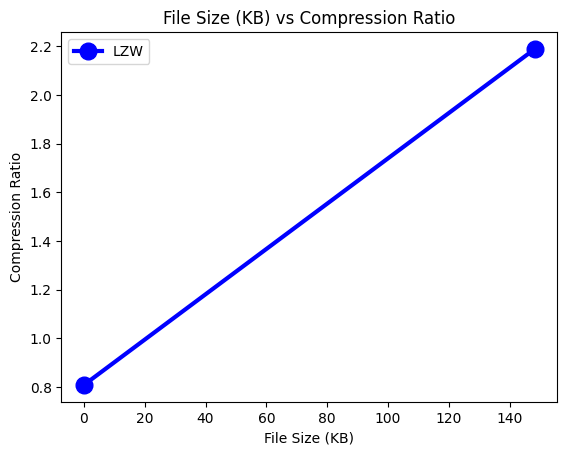

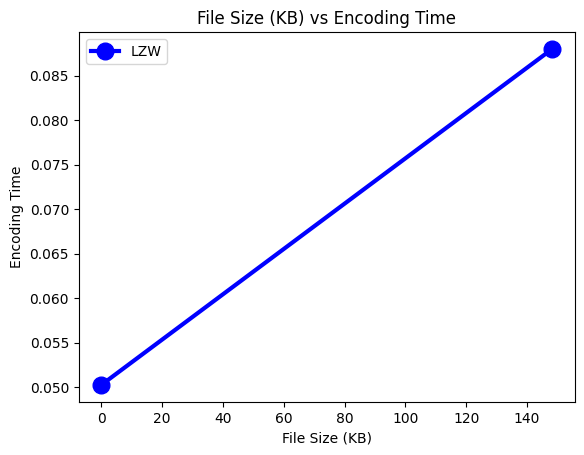

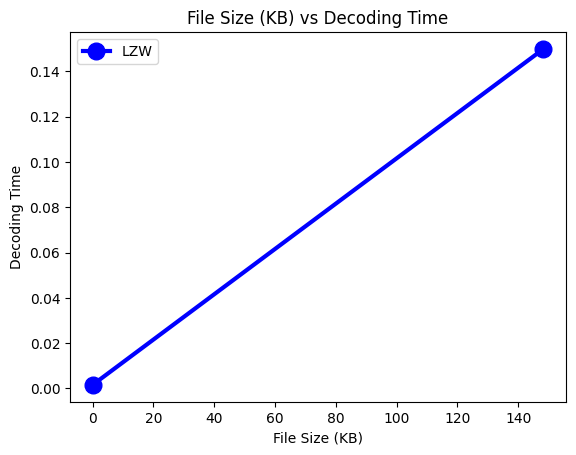

In [8]:
plot_stats(cr_lzw, encoding_time_lzw, decoding_time_lzw, file_sizes, 'LZW', "blue")

##### Comparing the compression ratios of all the algorithms

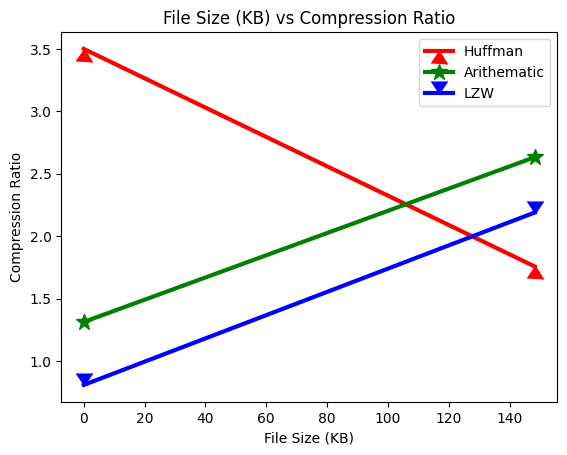

In [9]:
plot_stat_compare(file_sizes, cr_huffman, cr_ae, cr_lzw,'File Size (KB)', 'Compression Ratio')

##### Comparing the Encoding times of all the algorithms

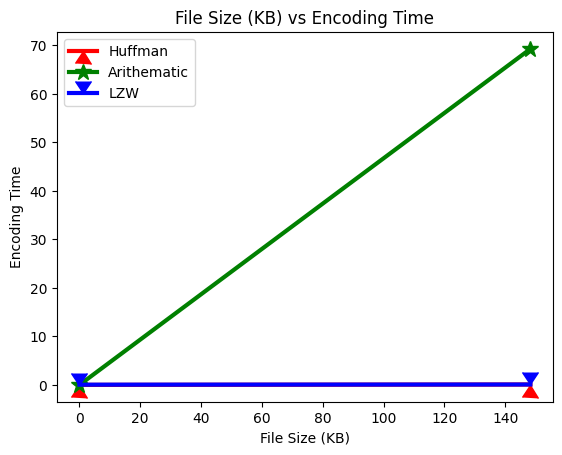

In [10]:
plot_stat_compare(file_sizes, encoding_time_huffman, encoding_time_ae, encoding_time_lzw, 'File Size (KB)', 'Encoding Time')

##### Comparing the Decoding times of all the algorithms

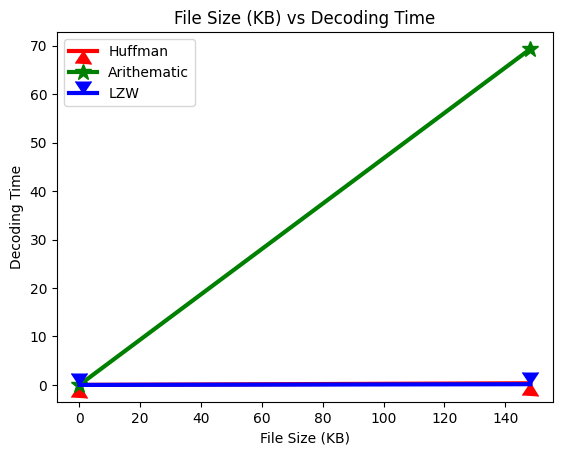

In [11]:
plot_stat_compare(file_sizes, decoding_time_huffman, decoding_time_ae, decoding_time_lzw,'File Size (KB)', 'Decoding Time')